In [44]:
import nltk;
from nltk.corpus import gutenberg
import re
from nltk.corpus import stopwords
import pandas as pd
import statistics 
import math
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import metrics
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [45]:
files_en = gutenberg.fileids()      # Get file ids
doc_en1 = gutenberg.open('edgeworth-parents.txt').read()
doc_en2 = gutenberg.open('milton-paradise.txt').read()
doc_en3 = gutenberg.open('whitman-leaves.txt').read()
tokens_en1 = re.sub('[^A-Za-z]', ' ', doc_en1)
tokens_en2 = re.sub('[^A-Za-z]', ' ', doc_en2)
tokens_en3 = re.sub('[^A-Za-z]', ' ', doc_en3)
#nltk.download('gutenberg')
tokens_en_lower1 = tokens_en1.lower()
tokens_en_lower2 = tokens_en2.lower()
tokens_en_lower3 = tokens_en3.lower()
from nltk.tokenize import word_tokenize
tokens_en_lower1 = word_tokenize(tokens_en_lower1)
tokens_en_lower2 = word_tokenize(tokens_en_lower2)
tokens_en_lower3 = word_tokenize(tokens_en_lower3)

filtered_words1 = [word for word in tokens_en_lower1 if word not in stopwords.words('english')]
filtered_words2 = [word for word in tokens_en_lower2 if word not in stopwords.words('english')]
filtered_words3 = [word for word in tokens_en_lower3 if word not in stopwords.words('english')]
en1 = nltk.Text(filtered_words1)
en2 = nltk.Text(filtered_words2)
en3 = nltk.Text(filtered_words3)

#print(len(en1.tokens))       # returns number of tokens (document length)
#print(len(set(en1.tokens)))  # returns number of unique tokens
#print(len(en2.tokens)) 
len(filtered_words1)
len(filtered_words2)
len(filtered_words3)

65029

In [62]:
#Segmentation
sampledData1=[]
sampledData2=[]
sampledData3=[]
sampledDataTest =[]
X1 = []
for i in range(0, 200*150,150):
    sampledData1.append(filtered_words1[i:i+150])
for j in range(0, 200*150,150):
    sampledData2.append(filtered_words2[j:j+150])
for k in range(0, 200*150,150):
    sampledData3.append(filtered_words3[k:k+150])
    
sampledData =sampledData1 + sampledData2 + sampledData3
dataframe = pd.DataFrame(sampledData)
dataframe= dataframe.apply(" ".join, axis=1)
dataframe = pd.DataFrame(dataframe)
dataframe.columns = ['Sample']
c = pd.DataFrame({'author':[],'Genre':[]})
frames =[dataframe,c]
MergedFrame = pd.concat(frames)
MergedFrame = MergedFrame[['Sample','author','Genre']]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [63]:
dataframe

,Sample
0,parent assistant maria edgeworth orphans near ...
1,good children finished eating suppers came rou...
2,resolved exert utmost first care pay debts mot...
3,charity sake neighbours poor enough bethought ...
4,debt schoolmistress would receive goat said co...
5,round side church saw mary kneeling beside gra...
6,could teach knit supply flax isabella sent nex...
7,largest longest best decayed labourers women c...
8,could made always believed said answer bid wai...
9,wear shoes stockings hurt feet besides waited ...


In [64]:
# Appending label on segments
for i in range(200):
    MergedFrame['Genre'][i] ="Fiction"
    MergedFrame['author'][i] =0
for i in range(200,400):
    MergedFrame['Genre'][i] ="Poetry"
    MergedFrame['author'][i] =1
for i in range(400,600):
    MergedFrame['Genre'][i] ="Tragedy"
    MergedFrame['author'][i] =2
    
#Shuffle

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.p

In [65]:
MergedFrame['Sample'][6]

'could teach knit supply flax isabella sent next day great service mary kept employment month sold yarn spun money enough buy warm flannel winter wear besides spinning well learned school plain work tolerably neatly isabella caroline employed work earned great deal could spinning leisure hours taught sisters read write edmund part money earned work doors paid schoolmaster teaching little arithmetic winter nights came used light rush candles mary work gathered stripped good provision rushes month august neighbour gave grease dip one evening lighted candles footman came sent isabella plain work mary servant englishman newly come ireland rush candles caught attention never seen came part england used edmund ready oblige proud candles noticed showed englishman made gave bundle rushes proper species rush says white natural history selborne seems juncus effusus common soft rush found moist pastures sides streams hedges rushes best condition height summer may gathered serve purpose well quite

In [110]:
#Transformation of TFiDF
from sklearn.feature_extraction.text import TfidfVectorizer
matrixTfidf = TfidfVectorizer(max_df=0.8, max_features=200000,stop_words='english',
                                 min_df=0.1,
                                 use_idf=True, ngram_range=(1,3))
XTfidf = matrixTfidf.fit_transform(MergedFrame['Sample']).todense()
XTfidf= pd.DataFrame(XTfidf, columns= matrixTfidf.get_feature_names())

In [111]:
XTfidf

,air,arms,away,best,better,bring,came,children,come,cried,...,till,time,voice,way,went,woman,words,work,world,young
0,0.000000,0.0,0.000000,0.121864,0.000000,0.000000,0.000000,0.269243,0.096288,0.000000,...,0.000000,0.096546,0.000000,0.000000,0.000000,0.000000,0.000000,0.114849,0.110269,0.130309
1,0.000000,0.0,0.125261,0.000000,0.000000,0.136189,0.103888,0.408566,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.113421,0.118277,0.000000,0.125770,0.116185,0.000000,0.000000
2,0.000000,0.0,0.153379,0.000000,0.000000,0.000000,0.127209,0.000000,0.119275,0.000000,...,0.000000,0.119595,0.000000,0.000000,0.144828,0.000000,0.000000,0.000000,0.000000,0.161417
3,0.000000,0.0,0.000000,0.000000,0.188125,0.000000,0.000000,0.194352,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.168791,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.115831,0.103398,0.134244,0.000000,0.375639,0.000000,0.000000,0.368995,0.000000,0.139555
5,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.579716,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.167824,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.0,0.000000,0.169292,0.000000,0.000000,0.427981,0.000000,0.133762,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.797732,0.000000,0.000000
7,0.000000,0.0,0.000000,0.218354,0.466970,0.241213,0.000000,0.241213,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.200409,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.166905,0.348102,0.000000,0.000000,0.341945,0.000000,0.000000
9,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.323468,0.000000,0.000000,0.000000,0.000000,0.000000


In [52]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(XTfidf)

In [13]:
len(dist)

600

In [14]:
dist

array([[ 0.00000000e+00,  4.25110657e-01,  6.36194871e-01, ...,
         8.98070529e-01,  8.30376982e-01,  8.48455715e-01],
       [ 4.25110657e-01, -2.22044605e-16,  8.57657994e-01, ...,
         8.28746684e-01,  9.10761565e-01,  9.52542961e-01],
       [ 6.36194871e-01,  8.57657994e-01, -2.22044605e-16, ...,
         8.67604825e-01,  6.51366141e-01,  1.00000000e+00],
       ...,
       [ 8.98070529e-01,  8.28746684e-01,  8.67604825e-01, ...,
         0.00000000e+00,  4.60482553e-01,  1.00000000e+00],
       [ 8.30376982e-01,  9.10761565e-01,  6.51366141e-01, ...,
         4.60482553e-01,  0.00000000e+00,  8.49927167e-01],
       [ 8.48455715e-01,  9.52542961e-01,  1.00000000e+00, ...,
         1.00000000e+00,  8.49927167e-01,  0.00000000e+00]])

In [67]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
model = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=1)
model.fit(XTfidf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=3, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [54]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = matrixTfidf.get_feature_names()
for i in range(3):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :100]:
        print(' %s' % terms[ind])

Top terms per cluster:
Cluster 0:
 heaven
 earth
 long
 men
 love
 man
 night
 shall
 old
 life
 day
 sea
 high
 great
 far
 like
 god
 light
 air
 soul
 time
 hand
 new
 sun
 pass
 know
 land
 place
 hell
 come
 work
 rest
 forth
 things
 world
 good
 deep
 stand
 till
 young
 stood
 head
 round
 arms
 words
 look
 way
 woman
 hear
 eyes
 sweet
 best
 make
 large
 soon
 nature
 joy
 let
 divine
 open
 saw
 face
 power
 away
 half
 right
 think
 hands
 heard
 left
 came
 house
 happy
 thought
 bring
 son
 say
 voice
 children
 present
 little
 tell
 leave
 better
 end
 fair
 home
 morning
 thing
 mother
 hope
 set
 mind
 thou
 knew
 said
 sure
 thy
 door
 father
Cluster 1:
 said
 susan
 mr
 little
 mother
 good
 came
 went
 father
 know
 time
 cried
 house
 sure
 come
 make
 saw
 day
 say
 let
 tell
 shall
 look
 door
 heard
 great
 home
 work
 thought
 morning
 knew
 old
 like
 think
 children
 half
 thing
 man
 away
 soon
 better
 way
 hands
 hope
 hand
 woman
 till
 leave
 night
 ro

In [55]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

In [19]:
from nltk.tag import pos_tag

def strip_proppers_POS(text):
    tagged = pos_tag(text.split()) #use NLTK's part of speech tagger
    non_propernouns = [word for word,pos in tagged if pos != 'NNP' and pos != 'NNPS']
    return non_propernouns

In [20]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#1b9e77', 2: '#1b9e77'}

#set up cluster names using a dict
cluster_names = {0: 'Edgeworth', 
                 1: 'Shakespear', 
                 2: 'Whitman', 
                 }

In [21]:
%matplotlib inline

In [22]:
from sklearn.cluster import KMeans

num_clusters = 3

km = KMeans(n_clusters=num_clusters)

%time km.fit(XTfidf)

clusters = km.labels_.tolist()

CPU times: user 118 ms, sys: 2.93 ms, total: 121 ms
Wall time: 64.8 ms


/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


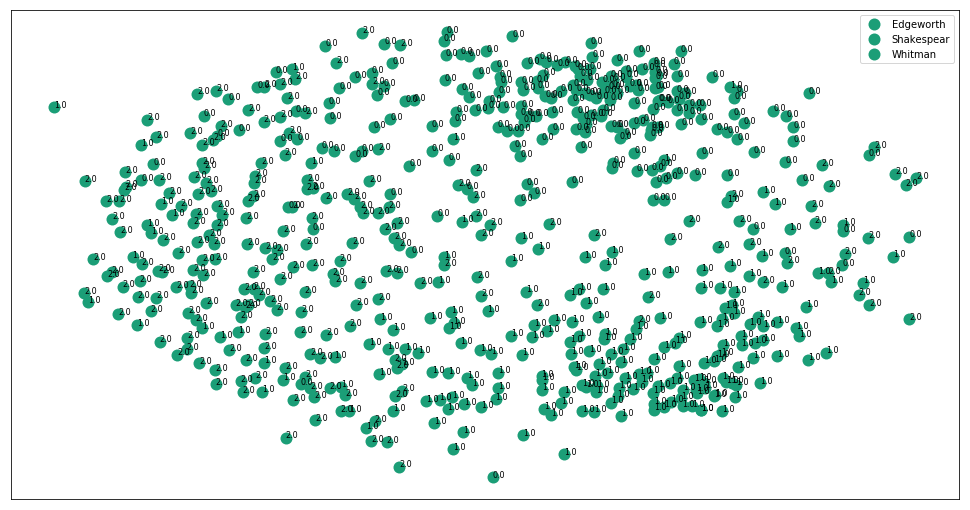

In [23]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=MergedFrame['author'])) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)

In [24]:
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3'}

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


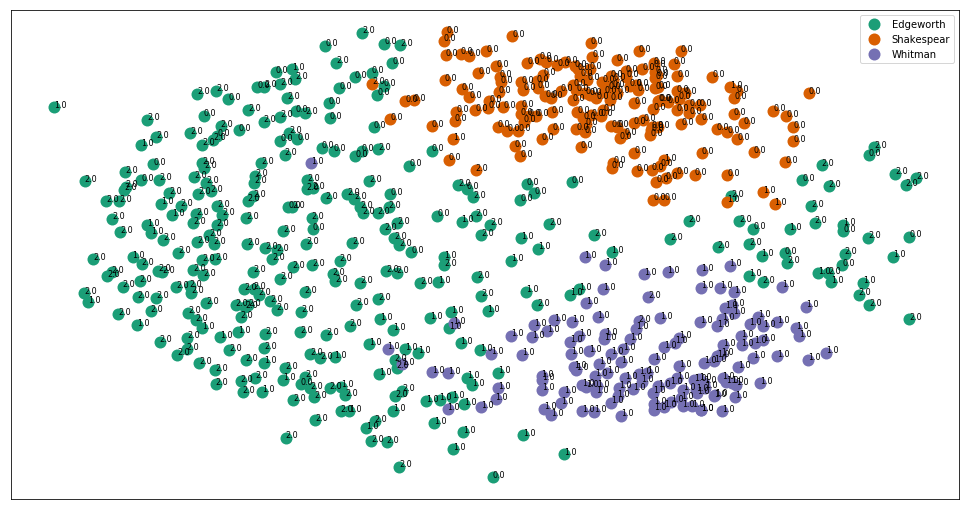

In [25]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=MergedFrame['author'])) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  

    
    
plt.show() #show the plot


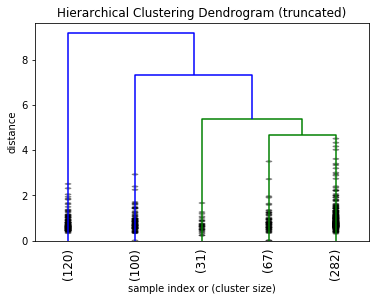

In [28]:
# Hierarchical clustering for the same dataset
# creating a dataset for hierarchical clustering
dataset1_standardized = XTfidf
dataset2_standardized = dataset1_standardized
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
# some setting for this notebook to actually show the graphs inline
# you probably won't need this
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation
#creating the linkage matrix
H_cluster = linkage(dataset2_standardized,'ward')
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    H_cluster,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=5,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [128]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

X, y = make_blobs(n_samples=600,
                  n_features=105,
                  centers=3,
                  center_box=(-10.0, 10.0),
                  #shuffle=True,
                 # random_state=1
                 )  # For reproducibility

range_n_clusters = [3]

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels_KMeans = clusterer.fit_predict(XTfidf)

In [115]:
cluster_labels_KMeans

array([0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1,

In [104]:
len(cluster_labels_KMeans)

600

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [7]:
# Generate some data
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=3,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

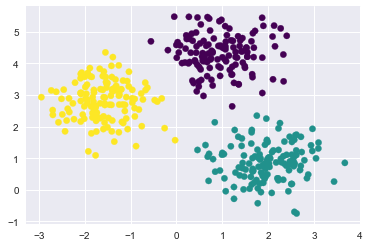

In [8]:
# Plot the data with K Means Labels
from sklearn.cluster import KMeans
kmeans = KMeans(3, random_state=0)
labels = kmeans.fit(XTfidf).predict(XTfidf)
plt.scatter(XTfidf[:, 0], XTfidf[:, 1], c=labels, s=40, cmap='viridis');

In [105]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, XTfidf, n_clusters=3, rseed=0, ax=None):
    labels = kmeans.fit_predict(XTfidf)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(XTfidf[:, 0], XTfidf[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(XTfidf[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

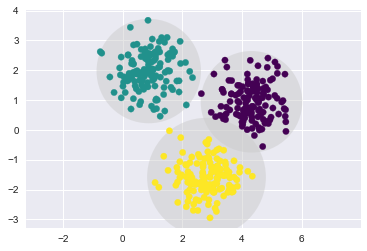

In [106]:
kmeans = KMeans(n_clusters=3, random_state=0)
plot_kmeans(kmeans, XTfidf)

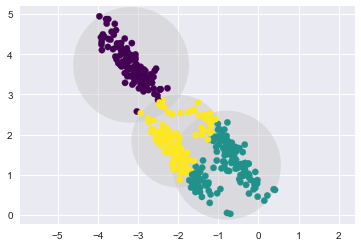

In [108]:
rng = np.random.RandomState(13)
X_stretched = np.dot(XTfidf, rng.randn(2, 2))

kmeans = KMeans(n_clusters=3, random_state=0)
plot_kmeans(kmeans, X_stretched)

In [123]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=3).fit(XTfidf)
cluster_labels_EM = gmm.predict(XTfidf)


In [124]:
cluster_labels_EM

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2,

In [128]:
probs = gmm.predict_proba(XTfidf)
print(probs[:5].round(3))

[[0.    1.    0.    0.   ]
 [0.    1.    0.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.001 0.999 0.   ]]


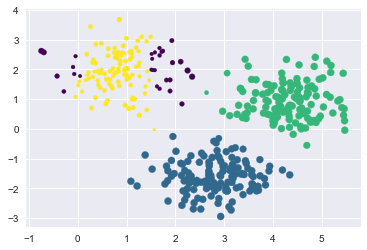

In [126]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(XTfidf[:, 0], XTfidf[:, 1], c=labels, cmap='viridis', s=size);

In [141]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, XTfidf, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(XTfidf).predict(XTfidf)
    if label:
        ax.scatter(XTfidf[:, 0], XTfidf[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(XTfidf[:, 0], XTfidf[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covars_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

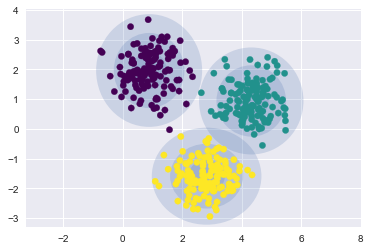

In [142]:
gmm = GMM(n_components=3, random_state=42)
plot_gmm(gmm, XTfidf)

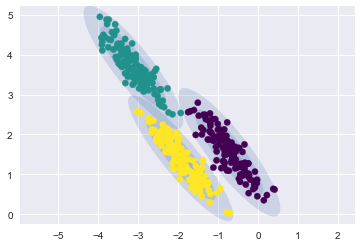

In [143]:
gmm = GMM(n_components=3, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)

[[ 0.94252276  4.31972696]
 [ 1.97280034  0.8791194 ]
 [-1.58281747  2.8130273 ]]


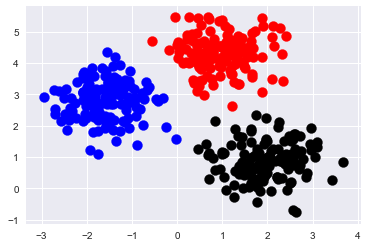

In [13]:
# create kmeans object
kmeans = KMeans(n_clusters=3)
# fit kmeans object to data
kmeans.fit(XTfidf)
# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)
# save new clusters for chart
y_km = kmeans.fit_predict(XTfidf)
plt.scatter(XTfidf[y_km ==0,0], XTfidf[y_km == 0,1], s=100, c='red')
plt.scatter(XTfidf[y_km ==1,0], XTfidf[y_km == 1,1], s=100, c='black')
plt.scatter(XTfidf[y_km ==2,0], XTfidf[y_km == 2,1], s=100, c='blue')


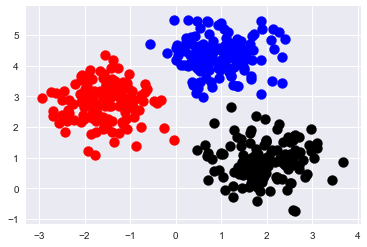

In [16]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
# create dendrogram
#dendrogram = sch.dendrogram(sch.linkage(XTfidf, method='ward'))
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict(XTfidf)
plt.scatter(XTfidf[y_hc ==0,0], XTfidf[y_hc == 0,1], s=100, c='red')
plt.scatter(XTfidf[y_hc==1,0], XTfidf[y_hc == 1,1], s=100, c='black')
plt.scatter(XTfidf[y_hc ==2,0], XTfidf[y_hc == 2,1], s=100, c='blue')

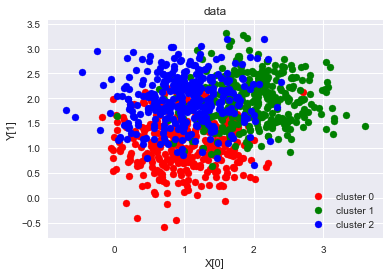

ARI:0.18299080173432208
Sum center distance 150.65513280767743


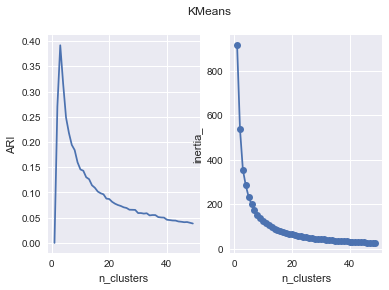

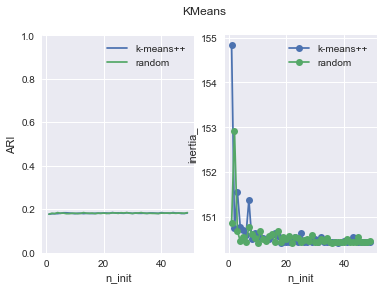

In [31]:

from sklearn import  cluster
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import adjusted_rand_score

def create_data(centers,num=100,std=0.7):
    '''
    generate data
    :param centers: dimension of centre
    :param num: number of sample
    :param std: std of each cluster
    :return: data, target
    '''
    XTfidf, labels_true = make_blobs(n_samples=num, centers=centers, cluster_std=std)
    return  XTfidf,labels_true
def plot_data(*data):
    '''
    graph the dataset
    :param data: data, target
    :return: None
    '''
    XTfidf,labels_true=data
    labels=np.unique(labels_true)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    colors='rgbyckm'
    for i,label in enumerate(labels):
        position=labels_true==label
        ax.scatter(XTfidf[position,0],XTfidf[position,1],label="cluster {0}".format(label),
		color=colors[i%len(colors)])

    ax.legend(loc="best",framealpha=0.5)
    ax.set_xlabel("X[0]")
    ax.set_ylabel("Y[1]")
    ax.set_title("data")
    plt.show()



def test_Kmeans(*data):
    '''
    test the Kmeans
    :param data: data, target
    :return: None
    '''
    XTfidf,labels_true=data
    clst=cluster.KMeans()
    clst.fit(XTfidf)
    predicted_labels=clst.predict(XTfidf)
    print("ARI:{0}".format( adjusted_rand_score(labels_true,predicted_labels)))
    print("Sum center distance {0}".format(clst.inertia_))
    
def test_Kmeans_nclusters(*data):
    '''
    test the performance with different n_clusters
    :param data: data, target
    :return: None
    '''
    XTfidf,labels_true=data
    nums=range(1,50)
    ARIs=[]
    Distances=[]
    for num in nums:
        clst=cluster.KMeans(n_clusters=num)
        clst.fit(XTfidf)
        predicted_labels=clst.predict(XTfidf)
        ARIs.append(adjusted_rand_score(labels_true,predicted_labels))
        Distances.append(clst.inertia_)

    ## graph
    fig=plt.figure()
    ax=fig.add_subplot(1,2,1)
    ax.plot(nums,ARIs,marker="+")
    ax.set_xlabel("n_clusters")
    ax.set_ylabel("ARI")
    ax=fig.add_subplot(1,2,2)
    ax.plot(nums,Distances,marker='o')
    ax.set_xlabel("n_clusters")
    ax.set_ylabel("inertia_")
    fig.suptitle("KMeans")
    plt.show()
def test_Kmeans_n_init(*data):
    '''
    test the performance with different n_init and init paramter
    :param data: data, target
    :return: None
    '''
    XTfidf,labels_true=data
    nums=range(1,50)
    ## graph
    fig=plt.figure()

    ARIs_k=[]
    Distances_k=[]
    ARIs_r=[]
    Distances_r=[]
    for num in nums:
            clst=cluster.KMeans(n_init=num,init='k-means++')
            clst.fit(XTfidf)
            predicted_labels=clst.predict(XTfidf)
            ARIs_k.append(adjusted_rand_score(labels_true,predicted_labels))
            Distances_k.append(clst.inertia_)

            clst=cluster.KMeans(n_init=num,init='random')
            clst.fit(XTfidf)
            predicted_labels=clst.predict(XTfidf)
            ARIs_r.append(adjusted_rand_score(labels_true,predicted_labels))
            Distances_r.append(clst.inertia_)

    ax=fig.add_subplot(1,2,1)
    ax.plot(nums,ARIs_k,marker="+",label="k-means++")
    ax.plot(nums,ARIs_r,marker="+",label="random")
    ax.set_xlabel("n_init")
    ax.set_ylabel("ARI")
    ax.set_ylim(0,1)
    ax.legend(loc='best')
    ax=fig.add_subplot(1,2,2)
    ax.plot(nums,Distances_k,marker='o',label="k-means++")
    ax.plot(nums,Distances_r,marker='o',label="random")
    ax.set_xlabel("n_init")
    ax.set_ylabel("inertia_")
    ax.legend(loc='best')

    fig.suptitle("KMeans")
    plt.show()

if __name__=='__main__':
    centers=[[1,1],[2,2],[1,2]]
    XTfidf,labels_true=create_data(centers,1000,0.5)
    plot_data(XTfidf,labels_true)
    test_Kmeans(XTfidf,labels_true)
    test_Kmeans_nclusters(XTfidf,labels_true)
    test_Kmeans_n_init(XTfidf,labels_true)

In [37]:
y_true = MergedFrame['author']

In [38]:
y_true

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
570    2.0
571    2.0
572    2.0
573    2.0
574    2.0
575    2.0
576    2.0
577    2.0
578    2.0
579    2.0
580    2.0
581    2.0
582    2.0
583    2.0
584    2.0
585    2.0
586    2.0
587    2.0
588    2.0
589    2.0
590    2.0
591    2.0
592    2.0
593    2.0
594    2.0
595    2.0
596    2.0
597    2.0
598    2.0
599    2.0
Name: author, Length: 600, dtype: float64

In [155]:
#Kappa Calculation
from sklearn.metrics import cohen_kappa_score
KappaScoreKMeans = cohen_kappa_score(y_true, cluster_labels_KMeans)
KappaScoreEM = cohen_kappa_score(y_true, cluster_labels_EM)

 # silhouette_scoreThe silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
#Silhouette Calculation
silhouette_avg_KMeans = silhouette_score(XTfidf, cluster_labels_KMeans)
silhouette_avg_EM = silhouette_score(XTfidf, cluster_labels_EM)

In [154]:
print(KappaScoreKMeans)
print(KappaScoreEM)
print(silhouette_avg_KMeans)
print(silhouette_avg_EM)

0.2825
0.2875
0.06694821938926901
0.06726288320180374


In [150]:
KappaScoreEM

0.2875